In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
videogame_data = pd.read_csv (r'VG_Data.csv')

In [69]:
videogame_data_filtered = videogame_data[videogame_data['Critic_Score'].notnull()]
videogame_data_filtered = videogame_data_filtered.fillna(0)
videogame_data_filtered['summed'] = videogame_data_filtered.Total_Shipped+videogame_data_filtered.Global_Sales

<AxesSubplot:xlabel='Critic_Score', ylabel='summed'>

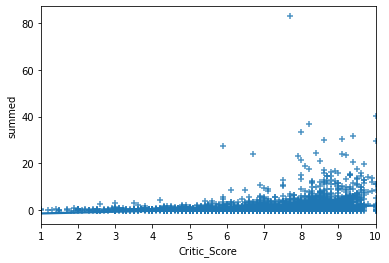

In [70]:
sns.regplot(videogame_data_filtered['Critic_Score'],videogame_data_filtered['summed'], marker = '+', y_jitter = 0.5)

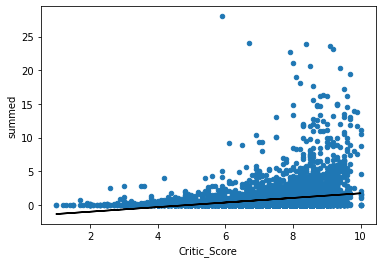

In [71]:
##Remove the outliers
video_game_no_outliers = videogame_data_filtered[videogame_data_filtered['summed'] < 30]
m, b = np.polyfit(video_game_no_outliers['Critic_Score'], video_game_no_outliers['summed'], 1)
video_game_no_outliers.plot.scatter('Critic_Score', 'summed')
plt.plot(video_game_no_outliers['Critic_Score'], m*video_game_no_outliers['Critic_Score'] + b, 'black')

In [72]:

genre_group = videogame_data_filtered.drop(columns=['Year', 'User_Score', 'Critic_Score', 'Rank']).groupby('Genre').sum()
genre_group.to_csv("genre.csv")
genre_group

,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,summed
Genre,,,,,,,
Action,164.67,625.39,314.31,208.66,31.48,70.49,790.06
Action-Adventure,49.12,83.08,34.05,35.05,2.84,11.16,132.20
Adventure,95.70,140.95,71.74,45.38,9.88,13.91,236.65
Board Game,0.00,0.30,0.06,0.22,0.01,0.02,0.30
Education,0.00,0.09,0.08,0.00,0.00,0.01,0.09
Fighting,100.75,145.30,78.90,36.91,16.38,13.21,246.05
MMO,13.36,2.74,1.60,0.71,0.15,0.28,16.10
Misc,185.99,180.06,103.95,49.13,7.46,19.34,366.05
Music,8.40,14.55,7.69,4.44,1.08,1.33,22.95


In [73]:
videogame_data_filtered = videogame_data
top_10_japan = videogame_data_filtered.sort_values('JP_Sales', ascending = False).head(10)
top_10_japan.to_csv("top_10_japan.csv")
top_10_japan

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
582,583,Yokai Watch 2: Psychic Specters,Role-Playing,E10,3DS,Nintendo,Level 5,NaN,NaN,NaN,2.95,0.12,0.12,2.69,0.02,2017.0
897,898,Yu-Gi-Oh: Duel Monsters 4,Role-Playing,NaN,GB,Konami,Konami,NaN,NaN,NaN,2.18,NaN,NaN,2.17,0.01,2000.0
284,285,Monster Hunter: World,Action,T,PS4,Capcom,Capcom,9.3,9.0,NaN,4.67,1.03,1.06,2.17,0.42,2018.0
715,716,Hot Shots Golf,Sports,NaN,PS,Sony Computer Entertainment,Camelot Software Planning,NaN,NaN,NaN,2.56,0.26,0.17,2.13,NaN,1998.0
635,636,Hot Shots Golf,Sports,NaN,PS,Sony Computer Entertainment,Camelot Software Planning,NaN,NaN,NaN,2.79,0.29,0.20,2.13,0.18,1998.0
978,979,Famista '89 - Kaimaku Han!!,Sports,NaN,NES,Namco,Namco,NaN,NaN,NaN,2.05,NaN,NaN,2.05,NaN,1989.0
881,882,R.B.I. Baseball,Sports,NaN,NES,Tengen,Namco,NaN,NaN,NaN,2.20,0.15,NaN,2.05,NaN,1988.0
943,944,Derby Stallion,Sports,NaN,PS,ASCII Entertainment,ParityBit,NaN,NaN,NaN,2.09,NaN,NaN,1.96,0.14,1997.0
216,217,Final Fantasy XIII,Role-Playing,T,PS3,Square Enix,Square Enix,8.0,9.2,NaN,5.35,1.75,1.23,1.87,0.51,2010.0
1134,1135,Dragon Quest XI,Role-Playing,NaN,3DS,Square Enix,Square Enix,NaN,NaN,NaN,1.82,NaN,NaN,1.82,NaN,2017.0


In [74]:
top_10_NA = videogame_data_filtered.sort_values('NA_Sales', ascending = False).head(10)
top_10_NA.to_csv("top_10_NA.csv")
top_10_NA

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
41,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,NaN,NaN,14.74,9.76,3.73,0.11,1.14,2010.0
40,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,NaN,NaN,14.82,9.07,4.29,0.13,1.33,2011.0
32,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,NaN,15.86,9.06,5.33,0.06,1.42,2013.0
49,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,9.5,9.0,NaN,13.53,8.54,3.63,0.08,1.28,2009.0
30,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,NaN,NaN,16.15,8.41,5.49,0.47,1.78,2002.0
46,47,Call of Duty: Black Ops II,Shooter,M,X360,Activision,Treyarch,NaN,NaN,NaN,13.86,8.27,4.32,0.07,1.20,2012.0
87,88,Halo: Reach,Shooter,M,X360,Microsoft Game Studios,Bungie,9.3,NaN,NaN,9.97,7.08,2.01,0.08,0.80,2010.0
53,54,Grand Theft Auto III,Action,M,PS2,Rockstar Games,DMA Design,9.5,NaN,NaN,13.10,6.99,4.51,0.30,1.30,2001.0
73,74,Grand Theft Auto IV,Action,M,X360,Rockstar Games,Rockstar North,10.0,NaN,NaN,11.09,6.80,3.11,0.14,1.04,2008.0
81,82,Call of Duty: Ghosts,Shooter,M,X360,Activision,Infinity Ward,6.9,NaN,NaN,10.41,6.76,2.64,0.04,0.98,2013.0


In [75]:
top_10_EU = videogame_data_filtered.sort_values('PAL_Sales', ascending = False).head(10)
top_10_EU.to_csv("top_10_EU.csv")
top_10_EU

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,NaN,20.32,6.37,9.85,0.99,3.12,2013.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
68,69,FIFA 18,Sports,E,PS4,EA Sports,EA Vancouver,8.3,NaN,NaN,11.80,1.27,8.64,0.15,1.73,2017.0
76,77,FIFA 17,Sports,E,PS4,Electronic Arts,EA Canada,8.9,NaN,NaN,10.94,1.26,7.95,0.12,1.61,2016.0
100,101,FIFA 19,Sports,E,PS4,Electronic Arts,EA Sports,NaN,NaN,NaN,9.15,0.84,6.87,0.10,1.34,2018.0
123,124,The Sims 3,Simulation,T,PC,Electronic Arts,EA Redwood Shores,8.5,NaN,NaN,7.96,1.01,6.46,NaN,0.50,2009.0
50,51,Call of Duty: WWII,Shooter,M,PS4,Activision,Sledgehammer Games,8.0,NaN,NaN,13.40,4.67,6.21,0.40,2.12,2017.0
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.8,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018.0
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015.0
47,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,NaN,NaN,NaN,13.80,4.99,5.88,0.65,2.28,2012.0


In [76]:
top_10_Other = videogame_data_filtered.sort_values('Other_Sales', ascending = False).head(10)
top_10_Other.to_csv("top_10_Other.csv")
top_10_Other

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,NaN,20.32,6.37,9.85,0.99,3.12,2013.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
421,422,Pro Evolution Soccer 2008,Sports,E,PS2,Konami,Konami,8.2,NaN,NaN,3.63,0.05,0.00,0.64,2.93,2008.0
524,525,FIFA Soccer 08,Sports,E,PS2,EA Sports,EA Canada,NaN,NaN,NaN,3.14,0.68,0.00,NaN,2.46,2007.0
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015.0
47,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,NaN,NaN,NaN,13.80,4.99,5.88,0.65,2.28,2012.0
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.8,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018.0
50,51,Call of Duty: WWII,Shooter,M,PS4,Activision,Sledgehammer Games,8.0,NaN,NaN,13.40,4.67,6.21,0.40,2.12,2017.0
726,727,PES 2009: Pro Evolution Soccer,Sports,E,PS2,Konami,Konami,NaN,NaN,NaN,2.50,0.13,0.07,0.26,2.05,2008.0
336,337,Metal Gear Solid 3: Snake Eater,Action,M,PS2,Konami,KCEJ / Kojima Productions,9.0,NaN,NaN,4.23,1.46,0.00,0.83,1.93,2004.0


In [77]:
videogame_data_filtered = videogame_data_filtered.fillna(0)
videogame_data_filtered['summed'] = videogame_data_filtered.Total_Shipped+videogame_data_filtered.Global_Sales
top_10_Global = videogame_data_filtered.sort_values('summed', ascending = False).head(10)
top_10_Global.to_csv("top_10_Global.csv")
top_10_Global

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,summed
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,0.0,82.86,0.0,0.0,0.0,0.0,0.0,2006.0,82.86
1,2,Super Mario Bros.,Platform,0,NES,Nintendo,Nintendo EAD,10.0,0.0,40.24,0.0,0.0,0.0,0.0,0.0,1985.0,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,0.0,0.0,0.0,0.0,0.0,2008.0,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,0,PC,PUBG Corporation,PUBG Corporation,0.0,0.0,36.60,0.0,0.0,0.0,0.0,0.0,2017.0,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,0.0,0.0,0.0,0.0,0.0,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,0.0,31.38,0.0,0.0,0.0,0.0,0.0,1998.0,31.38
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,0.0,0.0,0.0,0.0,0.0,2006.0,30.80
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,0.0,0.0,30.26,0.0,0.0,0.0,0.0,0.0,1989.0,30.26
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,0.0,0.0,0.0,0.0,0.0,2009.0,30.22
9,10,Minecraft,Misc,0,PC,Mojang,Mojang AB,10.0,0.0,30.01,0.0,0.0,0.0,0.0,0.0,2010.0,30.01


In [86]:
videogame_years = videogame_data_filtered[videogame_data_filtered['Year']>=1988].groupby(['Year','Genre']).sum()[['summed']]
df = videogame_years.reset_index()
df.to_csv('per_year.csv')
df

,Year,Genre,summed
0,1988.0,Role-Playing,0.00
1,1988.0,Shooter,0.00
2,1989.0,Platform,4.17
3,1990.0,Puzzle,0.00
4,1990.0,Role-Playing,2.30
...,...,...,...
354,2019.0,Music,0.00
355,2019.0,Platform,0.37
356,2019.0,Shooter,0.00
357,2020.0,Action,0.09


<AxesSubplot:xlabel='User_Score', ylabel='Critic_Score'>

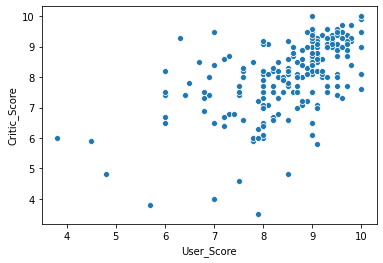

In [87]:
videogame_data_filtered = videogame_data[videogame_data['Critic_Score'].notnull()]
videogame_data_filtered = videogame_data_filtered.fillna(0)
videogame_data_filtered['summed'] = videogame_data_filtered.Total_Shipped+videogame_data_filtered.Global_Sales
user_and_critic = videogame_data_filtered[videogame_data_filtered['User_Score']!=0]
sns.scatterplot(x="User_Score", y="Critic_Score", data=user_and_critic)